# Imports

In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from Config.util import *

In [3]:
pd.set_option('display.max_columns', None)

# Dataset

In [4]:
data = pd.read_csv('Datasets/Household/h.csv')
data.head()

,id,Parent_Id,GenderId,Age,ISBimarKhas,IsMalool,Malool_shedat,Dashboard_postalcode7Digits,isurban,SabteAhval_provincename,SabteAhval_countyname,Has_SoeTaghzie,IsBehzisti_AfzayeshMostamari,IsKomite_AfzayeshMostamari,IsKomite_AfzayeshMostamariSayer,TripCountAirPilgrimage_95to99,TripCountAirNonPilgrimage_95to99,TripCountNonAirPilgrimage_95to99,TripCountNonAirNonPilgrimage_95to99,Has_Saham_Edalat,Decile,Percentile,HasMojavezSenfi,ISKarmanddolat_1402,IsRetired_Asli,IsRetired_Tabaie,is_bime_darman,IsBimePardaz,MandehAval_1399,MandehAkhar_1399,CardPerMonth_1399,Variz_1400,MandehAval_1400,MandehAkhar_1400,CardPerMonth_1400,CardPerMonth_1398,CardPerMonth_1401,CardPerMonth_1402,CardBeCardPerMonth_1401,CardBeCardPerMonth_1402,SatnaPerMonth_1401,SatnaPerMonth_1402,PayaPerMonth_1401,PayaPerMonth_1402,CarsPrice,CarsCount,Bourse_NetPortfoValue,Daramad
0,717641288407,327754746508,2,9.0,NaN,NaN,NaN,9315863.0,1.0,خراسان رضوی,نیشابور,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,54,0,0,NaN,NaN,1.0,NaN,0.0,2500000.0,0,NaN,NaN,NaN,0,0,1,0,10394,0,0,0,0,0,NaN,NaN,0.0,NaN
1,84729392521,84729392521,2,30.0,NaN,NaN,NaN,8914884.0,1.0,یزد,یزد,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9,84,0,0,NaN,NaN,1.0,NaN,97500000.0,7500000.0,4393256,1.250000e+08,7500000.0,67500000.0,4349470,0,45927276,438176831,14812151,35832227,0,0,0,0,1.150000e+10,1.0,0.0,NaN
2,480898026296,480898026296,1,33.0,NaN,NaN,NaN,4441634.0,1.0,گیلان,آستانه اشرفیه,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,10,100,0,0,NaN,NaN,NaN,NaN,77500000.0,125000000.0,184170555,1.750000e+10,125000000.0,650000000.0,265089461,88407700,1291805579,520640203,2172242444,592023137,5317036100,3659537521,3715516885,997795296,4.899300e+10,2.0,0.0,NaN
3,72903495587,824385263640,2,54.0,NaN,NaN,NaN,7419683.0,1.0,فارس,جهرم,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4,32,0,0,NaN,NaN,1.0,NaN,32500000.0,47500000.0,159708,1.750000e+08,47500000.0,125000000.0,1670825,17739735,18670053,3696301,9630108,2644516,0,0,0,0,NaN,NaN,0.0,NaN
4,597960900957,493995376717,2,35.0,NaN,NaN,NaN,5951745.0,1.0,آذربایجان غربی,بوکان,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,81,0,1,NaN,NaN,1.0,1.0,7500000.0,92500000.0,57545907,3.250000e+09,92500000.0,325000000.0,99661952,104915539,140449606,167328111,205950763,115154511,0,0,27622,69348260,NaN,NaN,3671880.0,147799911.0


In [4]:
target_col_name = 'Percentile'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697816 entries, 0 to 1697815
Data columns (total 48 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   Parent_Id                            int64  
 2   GenderId                             int64  
 3   Age                                  float64
 4   ISBimarKhas                          float64
 5   IsMalool                             float64
 6   Malool_shedat                        float64
 7   Dashboard_postalcode7Digits          float64
 8   isurban                              float64
 9   SabteAhval_provincename              object 
 10  SabteAhval_countyname                object 
 11  Has_SoeTaghzie                       float64
 12  IsBehzisti_AfzayeshMostamari         float64
 13  IsKomite_AfzayeshMostamari           float64
 14  IsKomite_AfzayeshMostamariSayer      float64
 15  TripCountAirPilgrimage_95to99   

In [7]:
data.isna().sum()

id                                           0
Parent_Id                                    0
GenderId                                     0
Age                                       1226
ISBimarKhas                            1684485
IsMalool                               1669397
Malool_shedat                          1670362
Dashboard_postalcode7Digits              40490
isurban                                  40490
SabteAhval_provincename                 141430
SabteAhval_countyname                   141430
Has_SoeTaghzie                         1557081
IsBehzisti_AfzayeshMostamari           1659708
IsKomite_AfzayeshMostamari             1609887
IsKomite_AfzayeshMostamariSayer        1686767
TripCountAirPilgrimage_95to99          1497745
TripCountAirNonPilgrimage_95to99       1497745
TripCountNonAirPilgrimage_95to99       1497745
TripCountNonAirNonPilgrimage_95to99    1497745
Has_Saham_Edalat                        814289
Decile                                       0
Percentile   

Because everyone has a parent in this dataframe we will add another column named parent_percentile. This is one the basic required changes to do to this dataset and is for educational purposes.

In [8]:
id_to_percentile = dict(zip(data['id'], data['Percentile']))
data['parent_percentile'] = data['Parent_Id'].map(id_to_percentile)
data.isna().sum()

id                                           0
Parent_Id                                    0
GenderId                                     0
Age                                       1226
ISBimarKhas                            1684485
IsMalool                               1669397
Malool_shedat                          1670362
Dashboard_postalcode7Digits              40490
isurban                                  40490
SabteAhval_provincename                 141430
SabteAhval_countyname                   141430
Has_SoeTaghzie                         1557081
IsBehzisti_AfzayeshMostamari           1659708
IsKomite_AfzayeshMostamari             1609887
IsKomite_AfzayeshMostamariSayer        1686767
TripCountAirPilgrimage_95to99          1497745
TripCountAirNonPilgrimage_95to99       1497745
TripCountNonAirPilgrimage_95to99       1497745
TripCountNonAirNonPilgrimage_95to99    1497745
Has_Saham_Edalat                        814289
Decile                                       0
Percentile   

As we can see some columns has so many nan values. We will analyze some of them to see if we can change them.

In [9]:
nan_cols = data.columns[data.isna().sum() > 800000]
for col in nan_cols:
    print(col)
    print(data[col].unique())

ISBimarKhas
[nan  1.]
IsMalool
[nan  1.]
Malool_shedat
[nan  3.  1.  2.  4.]
Has_SoeTaghzie
[nan  0.  1.]
IsBehzisti_AfzayeshMostamari
[nan  1.]
IsKomite_AfzayeshMostamari
[nan  1.]
IsKomite_AfzayeshMostamariSayer
[nan  1.]
TripCountAirPilgrimage_95to99
[nan  0.  1.  3.  2.  5.  4.  9. 32.  6.  8. 11. 14. 10. 42. 15. 35.  7.
 12. 65. 16. 13. 18. 45. 34. 47. 22. 48. 49. 30. 64. 53. 27. 29. 33. 25.
 46. 83. 26. 24. 39. 55. 19. 57.]
TripCountAirNonPilgrimage_95to99
[ nan   0.   1.   2.   5.   3.   4.   7.   8.   6.   9.  15.  10.  11.
  26.  14.  23.  22.  16.  32.  12.  17.  13. 137.  18.  19.  21.  30.
  44.  57.  52.  43.  34.  20. 105.  46.  28.  84.  64. 197. 175.  27.
  41. 145. 272. 159.  31. 107.  24. 236.  36. 157.  56. 120.  33.  38.
 117.  25. 114.  49.  62.  77. 112. 305.  39.  29. 283.  37.  71.  63.
  35.  78.  70.  81. 205.  68. 113.  48. 335.  66.  90.  54.  40.  89.
 103. 195.  45.  79. 141. 168. 109.  55.  47. 165.  92. 164. 176.]
TripCountNonAirPilgrimage_95to99
[ nan  

Now we will fix some of these columns and delete the rest.

In [10]:
# Fill NaN values in 'Malool_shedat' where 'IsMalool' is 1
data.loc[(data['IsMalool'] == 1) & (data['Malool_shedat'].isna()), 'Malool_shedat'] = 1

# Delete the Malool column as it's not necessary anymore
data.drop(columns=['IsMalool'], inplace=True)

# Set all NaN values in no zero columns to 0
no_zero_cols = ['Malool_shedat', 'ISBimarKhas', 'IsBehzisti_AfzayeshMostamari', 'IsKomite_AfzayeshMostamari',
                'IsKomite_AfzayeshMostamariSayer', 'Has_Saham_Edalat', 'IsRetired_Asli', 'IsRetired_Tabaie',
                'IsBimePardaz', 'CarsPrice', 'CarsCount']
for col in no_zero_cols:
    data[col].fillna(0, inplace=True)

# Deleting the rest
data.drop(columns=['TripCountNonAirNonPilgrimage_95to99', 'TripCountNonAirPilgrimage_95to99',
                   'TripCountAirNonPilgrimage_95to99', 'TripCountAirPilgrimage_95to99',
                   'Has_SoeTaghzie'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697816 entries, 0 to 1697815
Data columns (total 43 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   id                               int64  
 1   Parent_Id                        int64  
 2   GenderId                         int64  
 3   Age                              float64
 4   ISBimarKhas                      float64
 5   Malool_shedat                    float64
 6   Dashboard_postalcode7Digits      float64
 7   isurban                          float64
 8   SabteAhval_provincename          object 
 9   SabteAhval_countyname            object 
 10  IsBehzisti_AfzayeshMostamari     float64
 11  IsKomite_AfzayeshMostamari       float64
 12  IsKomite_AfzayeshMostamariSayer  float64
 13  Has_Saham_Edalat                 float64
 14  Decile                           int64  
 15  Percentile                       int64  
 16  HasMojavezSenfi                  int64  
 17  ISKarman

/var/folders/dn/jj_tz7717dz0k33tbysb91gh0000gn/T/ipykernel_25746/544786573.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(0, inplace=True)


In [11]:
data.isna().sum()

id                                       0
Parent_Id                                0
GenderId                                 0
Age                                   1226
ISBimarKhas                              0
Malool_shedat                            0
Dashboard_postalcode7Digits          40490
isurban                              40490
SabteAhval_provincename             141430
SabteAhval_countyname               141430
IsBehzisti_AfzayeshMostamari             0
IsKomite_AfzayeshMostamari               0
IsKomite_AfzayeshMostamariSayer          0
Has_Saham_Edalat                         0
Decile                                   0
Percentile                               0
HasMojavezSenfi                          0
ISKarmanddolat_1402                      0
IsRetired_Asli                           0
IsRetired_Tabaie                         0
is_bime_darman                      317365
IsBimePardaz                             0
MandehAval_1399                     324481
MandehAkhar

Now we will do the final analysis

In [12]:
data['is_bime_darman'].fillna(0, inplace=True)
data.drop(columns=['id', 'Parent_Id', 'Dashboard_postalcode7Digits'], inplace=True)
data.dropna(inplace=True)
data.info()

/var/folders/dn/jj_tz7717dz0k33tbysb91gh0000gn/T/ipykernel_25746/3598852585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['is_bime_darman'].fillna(0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 426817 entries, 4 to 1697815
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   GenderId                         426817 non-null  int64  
 1   Age                              426817 non-null  float64
 2   ISBimarKhas                      426817 non-null  float64
 3   Malool_shedat                    426817 non-null  float64
 4   isurban                          426817 non-null  float64
 5   SabteAhval_provincename          426817 non-null  object 
 6   SabteAhval_countyname            426817 non-null  object 
 7   IsBehzisti_AfzayeshMostamari     426817 non-null  float64
 8   IsKomite_AfzayeshMostamari       426817 non-null  float64
 9   IsKomite_AfzayeshMostamariSayer  426817 non-null  float64
 10  Has_Saham_Edalat                 426817 non-null  float64
 11  Decile                           426817 non-null  int64  
 12  Percen

In [13]:
data.nunique()

GenderId                                2
Age                                    96
ISBimarKhas                             2
Malool_shedat                           5
isurban                                 2
SabteAhval_provincename                31
SabteAhval_countyname                 464
IsBehzisti_AfzayeshMostamari            2
IsKomite_AfzayeshMostamari              2
IsKomite_AfzayeshMostamariSayer         2
Has_Saham_Edalat                        2
Decile                                 10
Percentile                            100
HasMojavezSenfi                         2
ISKarmanddolat_1402                     2
IsRetired_Asli                          2
IsRetired_Tabaie                        2
is_bime_darman                          2
IsBimePardaz                            2
MandehAval_1399                        60
MandehAkhar_1399                       60
CardPerMonth_1399                  401684
Variz_1400                             60
MandehAval_1400                   

Note that SabteAhval_countyname is an object column that has so many unique values so we will delete it.

In [14]:
data.drop(columns=['SabteAhval_countyname'], inplace=True)

Now it's time to convert some numeric categorical columns to string and check their type.

In [15]:
cat_cols = ['Malool_shedat', 'ISBimarKhas', 'IsBehzisti_AfzayeshMostamari', 'IsKomite_AfzayeshMostamari',
            'IsKomite_AfzayeshMostamariSayer', 'Has_Saham_Edalat', 'IsRetired_Asli', 'IsRetired_Tabaie',
            'IsBimePardaz', 'isurban', 'HasMojavezSenfi', 'ISKarmanddolat_1402', 'is_bime_darman', 
            'SabteAhval_provincename']

In [ ]:
data[cat_cols] = data[cat_cols].astype(str)
for col in cat_cols:
    print(f"{col} is{'' if is_consumption(data, col, target_col_name, 0.3) else ' not'} a consumption column")

Malool_shedat is a consumption column
ISBimarKhas is a consumption column
IsBehzisti_AfzayeshMostamari is a consumption column
IsKomite_AfzayeshMostamari is a consumption column
IsKomite_AfzayeshMostamariSayer is a consumption column
Has_Saham_Edalat is a consumption column
IsRetired_Asli is a consumption column
IsRetired_Tabaie is a consumption column
IsBimePardaz is a consumption column
isurban is a consumption column
HasMojavezSenfi is a consumption column
ISKarmanddolat_1402 is a consumption column
is_bime_darman is a consumption column
SabteAhval_provincename is not a consumption column


In [17]:
data[cat_cols].head()

,Malool_shedat,ISBimarKhas,IsBehzisti_AfzayeshMostamari,IsKomite_AfzayeshMostamari,IsKomite_AfzayeshMostamariSayer,Has_Saham_Edalat,IsRetired_Asli,IsRetired_Tabaie,IsBimePardaz,isurban,HasMojavezSenfi,ISKarmanddolat_1402,is_bime_darman,SabteAhval_provincename
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,1.0,آذربایجان غربی
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1.0,یزد
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.0,اصفهان
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1.0,تهران
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,خراسان شمالی


In [18]:
cat_cols.remove('SabteAhval_provincename')
data[cat_cols] = data[cat_cols].astype(float)
data[cat_cols] = data[cat_cols].astype(int)
data = encode_object_columns(data, ['SabteAhval_provincename'])

In [19]:
data = standardize_features(data, target_col_name)

There is a column named Decile which has to be deleted because it's technically leaking information. Also all the columns that are for the years before 1400 will be deleted because thay are old.

In [20]:
columns_to_drop = [col for col in data.columns if '1399' in col or '1398' in col]
columns_to_drop.append('Decile')
data.drop(columns=columns_to_drop, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426817 entries, 4 to 1697815
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   GenderId                         426817 non-null  float64
 1   Age                              426817 non-null  float64
 2   ISBimarKhas                      426817 non-null  float64
 3   Malool_shedat                    426817 non-null  float64
 4   isurban                          426817 non-null  float64
 5   SabteAhval_provincename          426817 non-null  float64
 6   IsBehzisti_AfzayeshMostamari     426817 non-null  float64
 7   IsKomite_AfzayeshMostamari       426817 non-null  float64
 8   IsKomite_AfzayeshMostamariSayer  426817 non-null  float64
 9   Has_Saham_Edalat                 426817 non-null  float64
 10  Percentile                       426817 non-null  int64  
 11  HasMojavezSenfi                  426817 non-null  float64
 12  ISKarm

In [22]:
data.to_csv("Datasets/Household/household.csv")

In [5]:
data = pd.read_csv("Datasets/Household/household.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
len(data)

426817

In [7]:
# As the number of data points is huge, we down sample it
data = data.sample(n = 12000)

In [8]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data.drop(columns=[target_col_name]))
data['PCA'] = pca_result[:, 0]

# Visualization

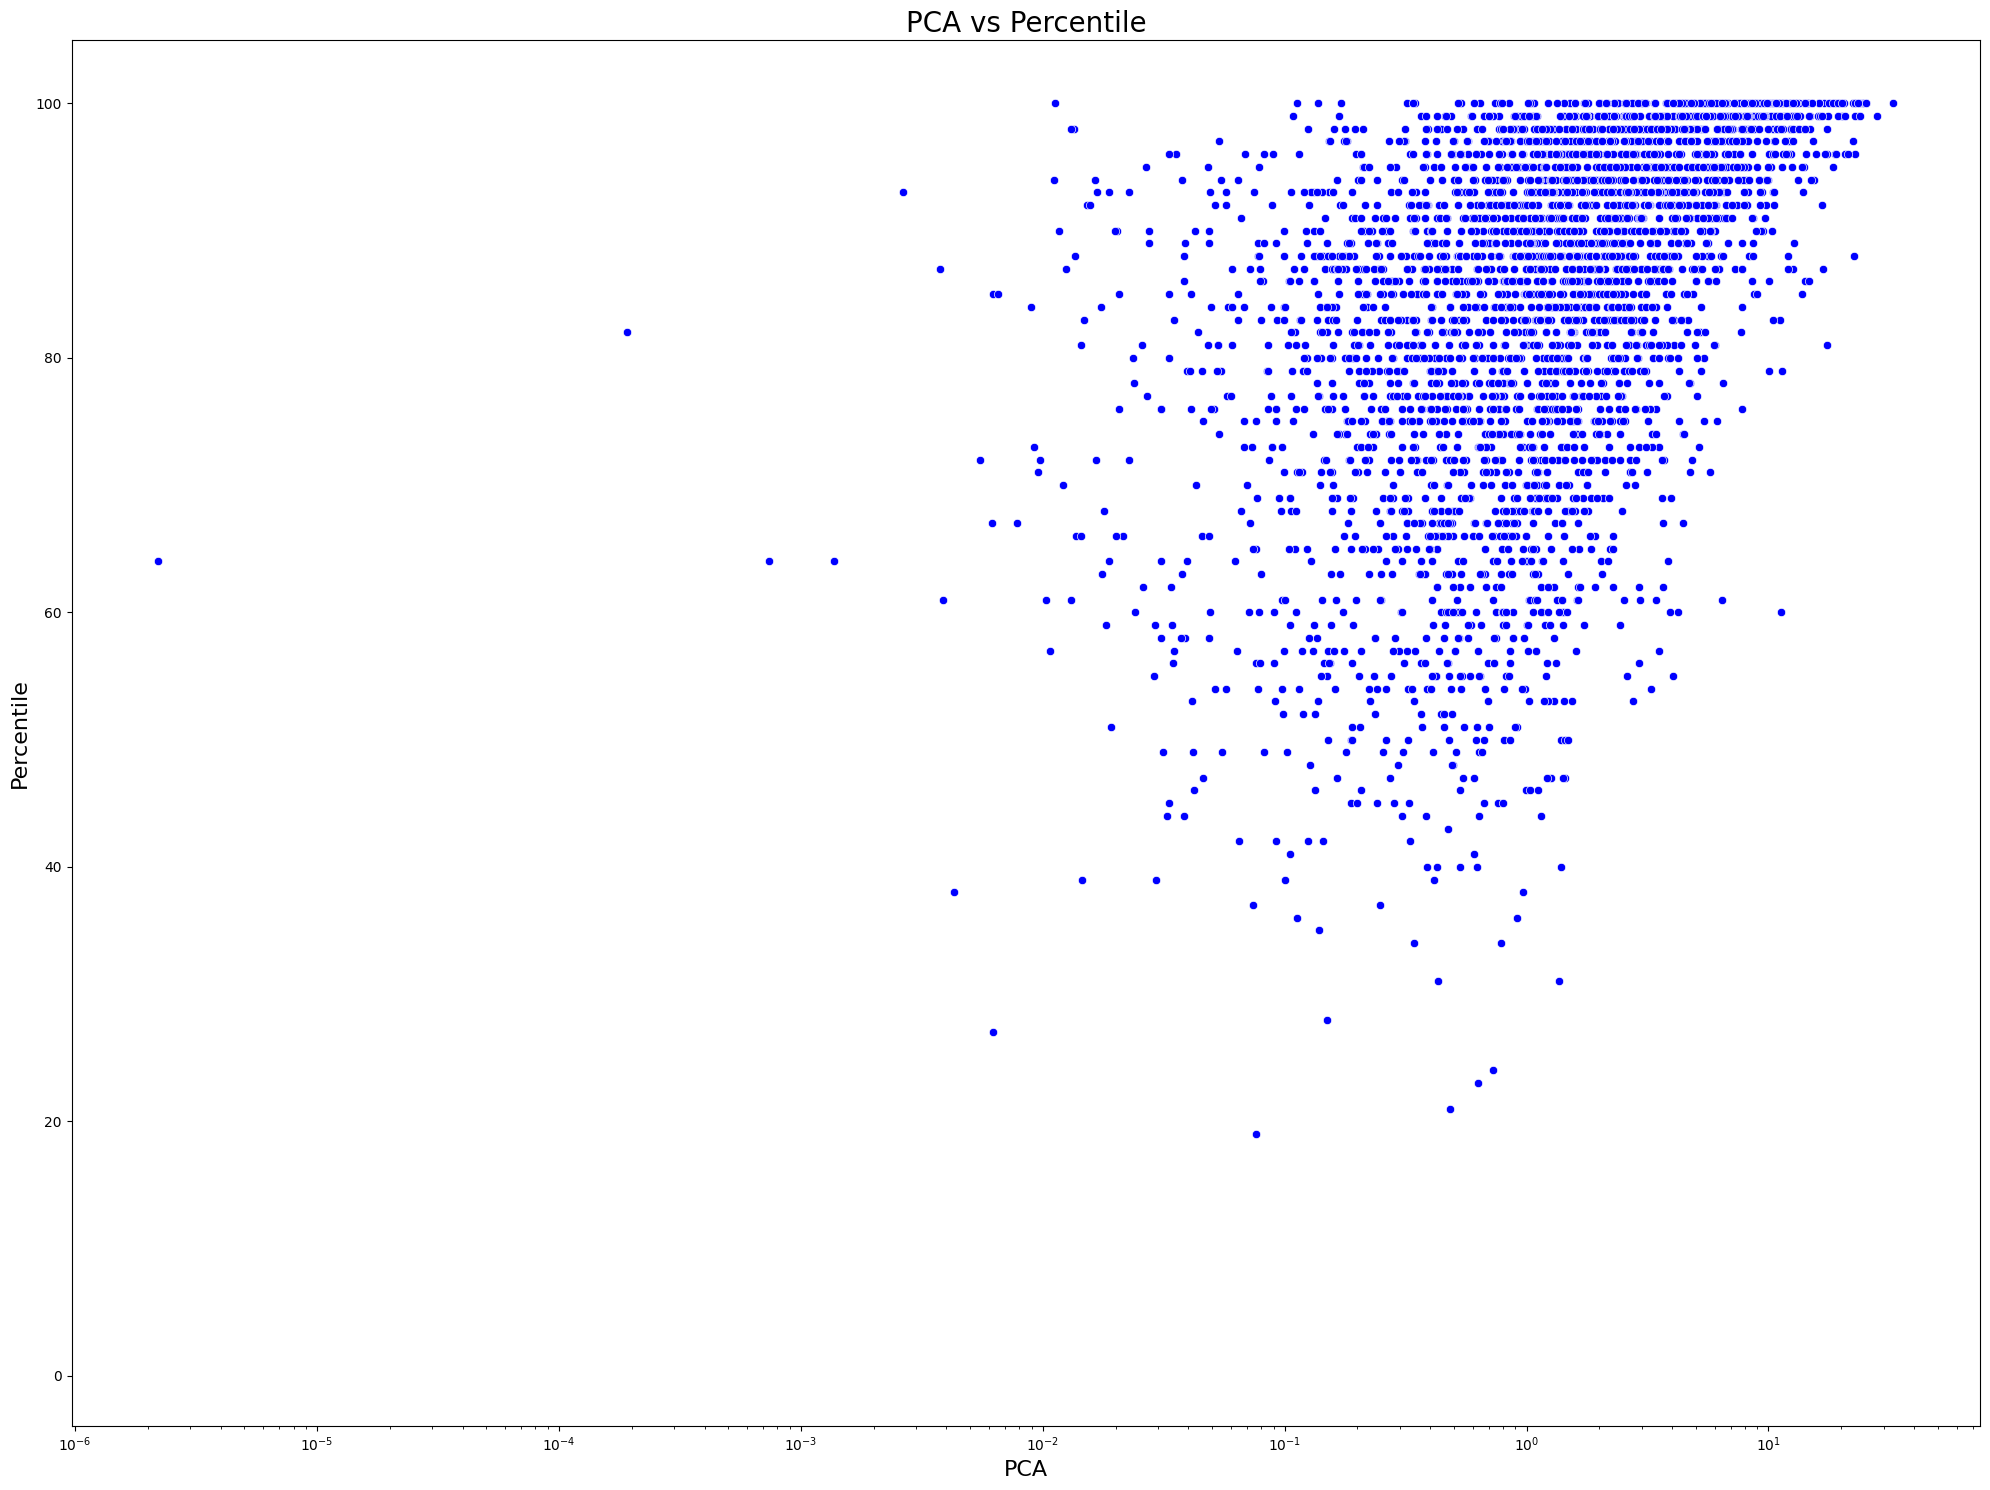

In [9]:
fig, axe = plt.subplots(figsize=(20, 15))

sns.scatterplot(x='PCA', y=target_col_name, data=data, ax=axe, color='b')
axe.set_title(f'PCA vs {target_col_name}', fontsize=20)
axe.set_xlabel('PCA', fontsize=16)
axe.set_ylabel(target_col_name, fontsize=16)
axe.set_xscale('log')
plt.tight_layout()
plt.show()

# Model

In [10]:
data.reset_index(inplace=True, drop=True)

In [11]:
test_pairs = generate_random_pairs(data, 20000)
test_df = create_pair_df(data, test_pairs, target_col_name)

In [12]:
tree_depth = int(np.round(np.sqrt(len(data.columns))))

In [13]:
mf1 = train_evaluate_repeat(generate_random_pairs, data, num_samples=500000, depth=tree_depth, test_df=test_df, use_bradley=True, exp=False, add_noise=False, noise=0.1, label_col=target_col_name, repeats=1)

100%|██████████| 1/1 [03:10<00:00, 190.98s/it]

Mean Accuracy: 0.84565
Mean Precision: 0.8405926809864758
Mean Recall: 0.8506591526617692
Mean F1 Score: 0.845595958585505


In [34]:
var, residuals = calculate_pca_var(data, target_col_name)
print(var)

26.626241449992726


In [35]:
# Calculating the number of pairs
max_pairs = len(data)
alpha = 1e-6

num_pairs = int(max_pairs / (1 + alpha * var))
print(num_pairs)

11999


In [36]:
pretrain_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': tree_depth
}
pretrained_model = pretrain_model_with_residuals(df=data, n_samples=num_pairs, pretrain_params=pretrain_params, target_col=target_col_name, residuals=residuals)

In [37]:
step = 50
num_samples = 800
repeats = 40

f1_scores_UB_repeats = []
f1_scores_UP_repeats = []
f1_scores_RB_repeats = []

# Create a for loop from n to num_samples with a step of n
for _ in range(repeats):
    f1_scores_UB, f1_scores_UP, f1_scores_RB = compare_three_methods(
        df=data,
        test_df=test_df,
        pretrain_params=pretrain_params,
        pretrained_model=pretrained_model,
        target_col=target_col_name,
        use_bradley=True,
        exp=False,
        add_noise=False,
        total_pairs=num_samples,
        batch_size=step,
    )
    f1_scores_UB_repeats.append(f1_scores_UB)
    f1_scores_UP_repeats.append(f1_scores_UP)
    f1_scores_RB_repeats.append(f1_scores_RB)

save_f1_scores("Plots/household_f1_repeat.pkl", f1_scores_UB_repeats, f1_scores_UP_repeats, f1_scores_RB_repeats)
# Compute the average F1 scores across repeats
average_f1_scores_UB = np.mean(f1_scores_UB_repeats, axis=0)
average_f1_scores_UP = np.mean(f1_scores_UP_repeats, axis=0)
average_f1_scores_RB = np.mean(f1_scores_RB_repeats, axis=0)

Blank model with random pairs: 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]


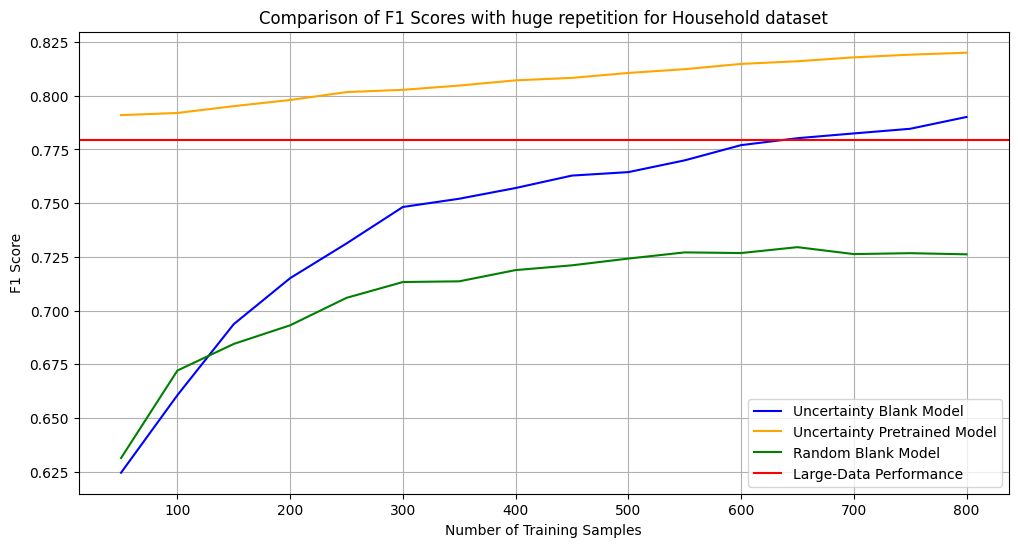

In [38]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(step, num_samples+1, step), average_f1_scores_UB, label='Uncertainty Blank Model', color='blue')
plt.plot(range(step, num_samples+1, step), average_f1_scores_UP, label='Uncertainty Pretrained Model', color='orange')
plt.plot(range(step, num_samples+1, step), average_f1_scores_RB, label='Random Blank Model', color='green')
plt.axhline(y = mf1, color = 'r', linestyle = '-', label='Large-Data Performance')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores with huge repetition for Household dataset')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
step = 50
num_samples = 10000
repeats = 1

f1_scores_UB_repeats2 = []
f1_scores_UP_repeats2 = []
f1_scores_RB_repeats2 = []

# Create a for loop from n to num_samples with a step of n
for _ in range(repeats):
    f1_scores_UB, f1_scores_UP, f1_scores_RB = compare_three_methods(
        df=data,
        test_df=test_df,
        pretrain_params=pretrain_params,
        pretrained_model=pretrained_model,
        target_col=target_col_name,
        use_bradley=True,
        exp=False,
        add_noise=False,
        total_pairs=num_samples,
        batch_size=step,
    )
    f1_scores_UB_repeats2.append(f1_scores_UB)
    f1_scores_UP_repeats2.append(f1_scores_UP)
    f1_scores_RB_repeats2.append(f1_scores_RB)

save_f1_scores("Plots/household_f1_wide.pkl", f1_scores_UB_repeats2, f1_scores_UP_repeats2, f1_scores_RB_repeats2)
# Compute the average F1 scores across repeats
average_f1_scores_UB2 = np.mean(f1_scores_UB_repeats2, axis=0)
average_f1_scores_UP2 = np.mean(f1_scores_UP_repeats2, axis=0)
average_f1_scores_RB2 = np.mean(f1_scores_RB_repeats2, axis=0)

Blank model with random pairs: 100%|██████████| 200/200 [02:12<00:00,  1.51it/s]


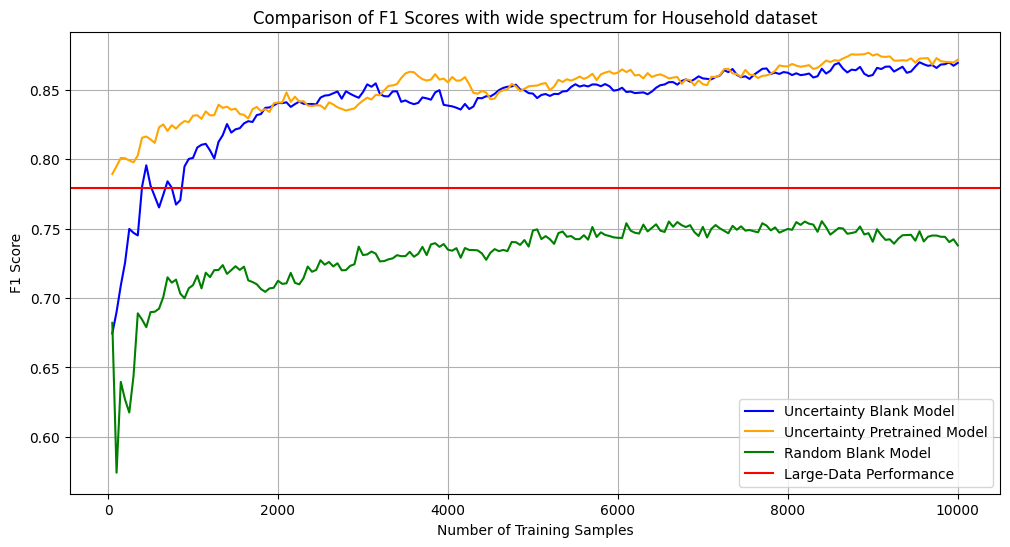

In [40]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(step, num_samples+1, step), average_f1_scores_UB2, label='Uncertainty Blank Model', color='blue')
plt.plot(range(step, num_samples+1, step), average_f1_scores_UP2, label='Uncertainty Pretrained Model', color='orange')
plt.plot(range(step, num_samples+1, step), average_f1_scores_RB2, label='Random Blank Model', color='green')
plt.axhline(y = mf1, color = 'r', linestyle = '-', label='Large-Data Performance')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores with wide spectrum for Household dataset')
plt.legend()
plt.grid(True)
plt.show()